# ___Problem Statement___

- ___Lithion power is the largest producer of electric vehicle(e-vehicle) batteries.They provide batteries on rent to e-vehicle drivers. Drivers rent a battery typically for a day and thereafter replacing it with a charged battery from the company.___
- ___Lithion power has a variable pricing model based on the driver's driving history. Battery life depends on factors such as over speeding, distance driven per day, etc.___
- ___We are supposed to create a cluster model where drivers can be grouped together based on the driving data and group the datapoints so that drivers will be incentivized based on the cluster.___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6) # for handling default met plot live values

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')


- ___Please note for the sake of simplicity, we will take only two features mean distance driven by driver per day and the mean percentages of times that a driver drove higher than five miles per hour over the speed limit.___

In [2]:
df = pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\Simplilearn\Machine Learning\dataset\driver-data.csv")

In [3]:
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [5]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
# I dropped the ID Column as it doesn't have any reference in forming cluster

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [8]:
df_analyze = df.drop('id',axis=1)

In [9]:
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

- The Algo is now fitted on data  and it has created the clusters   

In [10]:
# Get Info about these clusters 
kmeans.cluster_centers_ # Commands use to determine the cluster center vectors  

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [11]:
print(kmeans.labels_) # to display the labels
print(len(kmeans.labels_)) # to display the length of those labels

[0 0 0 ... 1 1 1]
4000


In [12]:
# Check how many unique drivers are there in the first and second cluster
unique ,counts = np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 3200, 1: 800}


In [13]:
df_analyze['cluster_2'] = kmeans.labels_

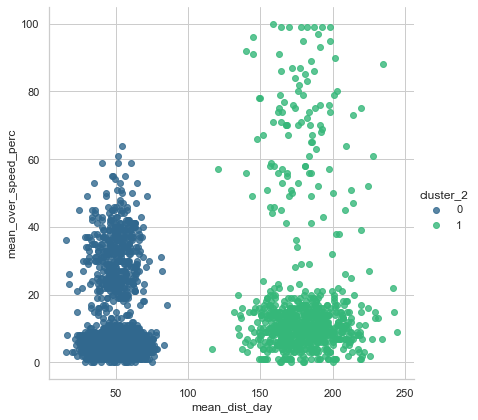

In [19]:
# Set the white theme grid because it better suited to plot with heavy data elements
sns.set_style("whitegrid")
sns.lmplot("mean_dist_day", "mean_over_speed_perc",data=df_analyze ,hue="cluster_2",
           palette='viridis',size=6, aspect=1,fit_reg=False)

- We can clearly see from the graph plotted that there are two clusters one centered around 50 mean distance delay 
and the other around 175. Also we can see that there are more drivers in the cluster with the delay centered at 175. 

- Since K means clustering gives optimim results when iterated multiple times, lets try out with the same with increasing number of clusters = 4

In [15]:
kmeans_4 = KMeans(n_clusters=4)

In [16]:
kmeans_4.fit(df.drop("id",axis=1))

print(kmeans_4.cluster_centers_)

[[180.34311782  10.52011494]
 [ 49.99263253   5.20447169]
 [ 50.40482436  32.36533958]
 [177.83509615  70.28846154]]


In [17]:
# Track the 4 unique labels along with their frequency of occurance
unique ,counts = np.unique(kmeans_4.labels_,return_counts=True)

#Zip the unique number of clusters and their frequency count within a dictionary
print(dict(zip(unique,counts)))

{0: 696, 1: 2773, 2: 427, 3: 104}


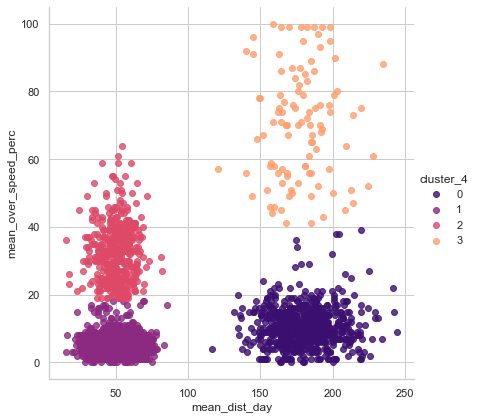

In [18]:
# Distribution od data point in each cluster
df['cluster_4'] = kmeans_4.labels_
# Set the white theme grid because it better suited to plot with heavy data elements
sns.set_style("whitegrid")
sns.lmplot("mean_dist_day", "mean_over_speed_perc",data=df,
           hue="cluster_4",palette='magma',size=6, aspect=1,fit_reg=False)

- its denser compared to the two cluster plot and hence more optimal

# ___Summary Table___

### Step-1 : Import Liabraries and Dataset
### Step-2 : Fit the K-means model on the dataset
### Step-3 : Evaluate cluster center and labels 
### Step-4 : Plot the cluster to see the distribution of datapoints
### Step-5 : Iterate the same by changing the number of cluster to 4
### Step-6 : Again evaluate the cluster to see the distribution of datapoints 
### Step-7 : Again Plot the cluster to see the distribution of datapoints
### Step-8 : Draw inferences out of both the plot 